In [1]:
# In this notebook:

# Quick exploration of Transport for London historic ridership

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_url = 'https://data.london.gov.uk/dataset/public-transport-journeys-type-transport'

In [4]:
torig = pd.read_csv('tfl-journeys-type.csv')

print(f'Dataset shape is {torig.shape}')

torig.head(5)

Dataset shape is (117, 12)


,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN


In [5]:
torig.info()
# Some missing values for early overground journeys
# More missing values for Emirates Air and Rail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 12 columns):
Period and Financial year        117 non-null object
Reporting Period                 117 non-null int64
Days in period                   117 non-null int64
Period beginning                 117 non-null object
Period ending                    117 non-null object
Bus journeys (m)                 117 non-null float64
Underground journeys (m)         117 non-null float64
DLR Journeys (m)                 117 non-null float64
Tram Journeys (m)                117 non-null float64
Overground Journeys (m)          110 non-null float64
Emirates Airline Journeys (m)    88 non-null float64
TfL Rail Journeys (m)            51 non-null float64
dtypes: float64(7), int64(2), object(3)
memory usage: 11.0+ KB


In [6]:
# fill in missing values for overground
torig['Overground Journeys (m)'].fillna(value=0, inplace=True)

torig.head(10)

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,0.0,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,0.0,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,0.0,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,0.0,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,0.0,NaN,NaN
5,06_10/11,6,28,22-Aug-10,18-Sep-10,175.8,80.9,5.5,2.0,0.0,NaN,NaN
6,07_10/11,7,28,19-Sep-10,16-Oct-10,189.8,88.7,6.3,2.3,0.0,NaN,NaN
7,08_10/11,8,28,17-Oct-10,13-Nov-10,179.9,90.3,6.7,2.2,5.6,NaN,NaN
8,09_10/11,9,28,14-Nov-10,11-Dec-10,178.8,90.6,6.4,2.3,5.4,NaN,NaN
9,10_10/11,10,28,12-Dec-10,08-Jan-11,140.1,72.5,4.8,1.8,3.5,NaN,NaN


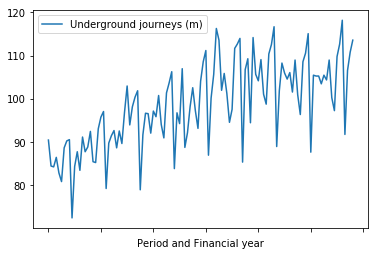

In [7]:
torig.plot(x='Period and Financial year', y='Underground journeys (m)')

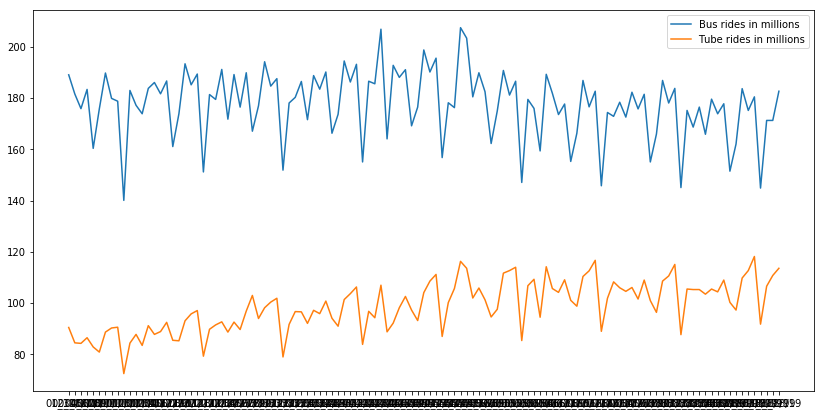

In [8]:
# visualizing bus rides versus tube rides
plt.figure(figsize=(14, 7))
plt.plot('Period and Financial year', 'Bus journeys (m)', data=torig, label='Bus rides in millions')
plt.plot('Period and Financial year', 'Underground journeys (m)', data=torig, label='Tube rides in millions')
plt.legend()

plt.show()

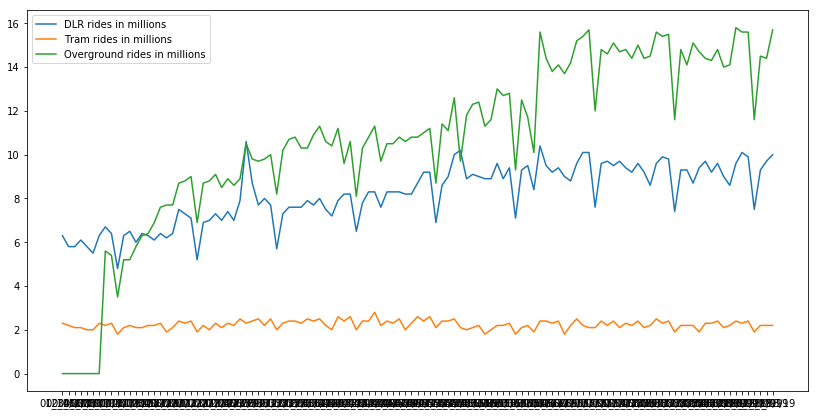

In [9]:
# visualizing DLR, Tram and overground rides due to closer ride count
plt.figure(figsize=(14, 7))
plt.plot('Period and Financial year', 'DLR Journeys (m)', data=torig, label='DLR rides in millions')
plt.plot('Period and Financial year', 'Tram Journeys (m)', data=torig, label='Tram rides in millions')
plt.plot('Period and Financial year', 'Overground Journeys (m)', data=torig, label='Overground rides in millions')
plt.legend()

plt.show()

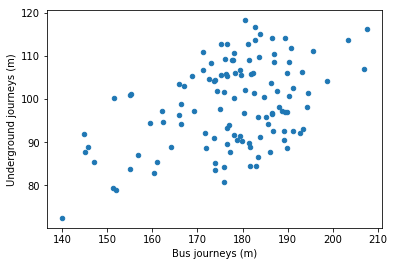

In [10]:
# visualizing correlation between bus and tube rides
torig.plot(x='Bus journeys (m)', y='Underground journeys (m)', kind='scatter')

In [11]:
torig.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,0.0,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,0.0,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,0.0,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,0.0,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,0.0,NaN,NaN


In [12]:
# to confirm that current dates are not in datetime format
print(f'torig.iloc[0,3] Type: {type(torig.iloc[0,3])}')

torig.iloc[0,3] Type: <class 'str'>


In [13]:
# creating a dataframe copy for modification and comparison
tedit = torig.copy()

In [14]:
tedit['pstart'] = pd.to_datetime(tedit['Period beginning'])
tedit['pend'] = pd.to_datetime(tedit['Period ending'])

tedit.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m),pstart,pend
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,0.0,NaN,NaN,2010-04-01,2010-05-01
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,0.0,NaN,NaN,2010-05-02,2010-05-29
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,0.0,NaN,NaN,2010-05-30,2010-06-26
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,0.0,NaN,NaN,2010-06-27,2010-07-24
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,0.0,NaN,NaN,2010-07-25,2010-08-21


In [15]:
(tedit.iloc[0, -2] + (tedit.iloc[0, -1] - tedit.iloc[0, -2]) /2).replace(day=1)

Timestamp('2010-04-01 00:00:00')

In [16]:
def new_start(start, end):
    return (start + (end - start)/2).replace(day=1, hour=0)

tedit['newstart'] = tedit.apply(lambda x: new_start(x.pend, x.pstart), axis=1)
tedit['test'] = 5

tedit.head(5)

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m),pstart,pend,newstart,test
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,0.0,NaN,NaN,2010-04-01,2010-05-01,2010-04-01,5
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,0.0,NaN,NaN,2010-05-02,2010-05-29,2010-05-01,5
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,0.0,NaN,NaN,2010-05-30,2010-06-26,2010-06-01,5
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,0.0,NaN,NaN,2010-06-27,2010-07-24,2010-07-01,5
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,0.0,NaN,NaN,2010-07-25,2010-08-21,2010-08-01,5


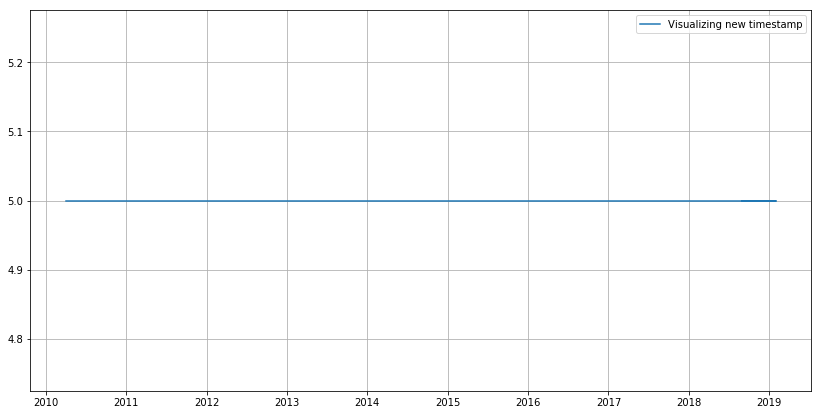

In [17]:
# quick visualization of new timestamp distribution
plt.figure(figsize=(14, 7))
plt.plot('newstart', 'test', data=tedit, label='Visualizing new timestamp')
plt.legend()
plt.grid(True)

plt.show()

In [18]:
tedit.pop('pstart')
tedit.pop('pend')
tedit.pop('test')

tedit.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m),newstart
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,0.0,NaN,NaN,2010-04-01
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,0.0,NaN,NaN,2010-05-01
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,0.0,NaN,NaN,2010-06-01
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,0.0,NaN,NaN,2010-07-01
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,0.0,NaN,NaN,2010-08-01


In [21]:
# we see that some months have less uniform start dates;
# timestamp will need to be re-evaluated
t18 = tedit[(tedit['newstart'] > '2017-12-01') & (tedit['newstart'] < '2019-01-01')]

print(t18.shape)

t18

(14, 13)


,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m),newstart
101,11_17/18,11,28,07-Jan-18,03-Feb-18,175.2,105.5,9.3,2.2,14.8,0.07,3.7,2018-01-01
102,12_17/18,12,28,04-Feb-18,03-Mar-18,168.7,105.3,9.3,2.2,14.1,0.10,3.4,2018-02-01
103,13_17/18,13,28,04-Mar-18,31-Mar-18,176.5,105.3,8.7,2.2,15.1,0.10,3.3,2018-03-01
104,01_18/19,1,28,01-Apr-18,28-Apr-18,165.9,103.5,9.4,1.9,14.7,0.12,3.5,2018-04-01
105,02_18/19,2,28,29-Apr-18,26-May-18,179.6,105.5,9.7,2.3,14.4,0.11,3.7,2018-05-01
106,03_18/19,3,28,27-May-18,23-Jun-18,173.9,104.4,9.2,2.3,14.3,0.11,4.2,2018-06-01
107,04_18/19,4,28,24-Jun-18,21-Jul-18,177.8,109.0,9.6,2.4,14.8,0.12,4.5,2018-07-01
108,05_18/19,5,28,22-Jul-18,18-Aug-18,151.5,100.3,9.0,2.1,14.0,0.16,4.1,2018-08-01
109,06_18/19,6,28,19-Aug-18,15-Sep-18,162.1,97.3,8.6,2.2,14.1,0.12,4.1,2018-09-01
110,07_18/19,7,28,16-Sep-18,13-Oct-18,183.7,109.8,9.6,2.4,15.8,0.09,4.7,2018-09-01


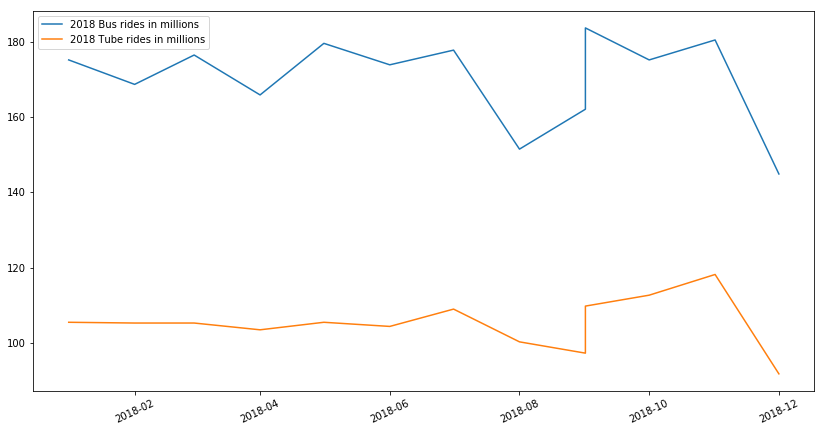

In [31]:
# visualizing bus rides versus tube rides in 2018

t18 = t18[:-1]
plt.figure(figsize=(14, 7))
plt.plot('newstart', 'Bus journeys (m)', data=t18, label='2018 Bus rides in millions')
plt.plot('newstart', 'Underground journeys (m)', data=t18, label='2018 Tube rides in millions')
plt.legend()
plt.xticks(rotation=25)

plt.show()